# Предобработка

Поскольку в таблице пропущенных значений нет, то обработка не производилась.
Чтобы убедиться в отсутствие пропущенных значений, использовалась команда.
```
pandas.isnull(obj) # detect missing values an array-like object.

DataFrame.dropna(how='any') # remove missing values. 'any': if any NA values are present, drop that row or column.
```

Построен график по изменению цены открытия для каждой компании, поскольку так легче сравнить их цену.

Добавлено новое поле - разница минимальной и максимальной цены в торговый день.
Такой признак позволяет оценить волатильность рынка в конкретный период времени.

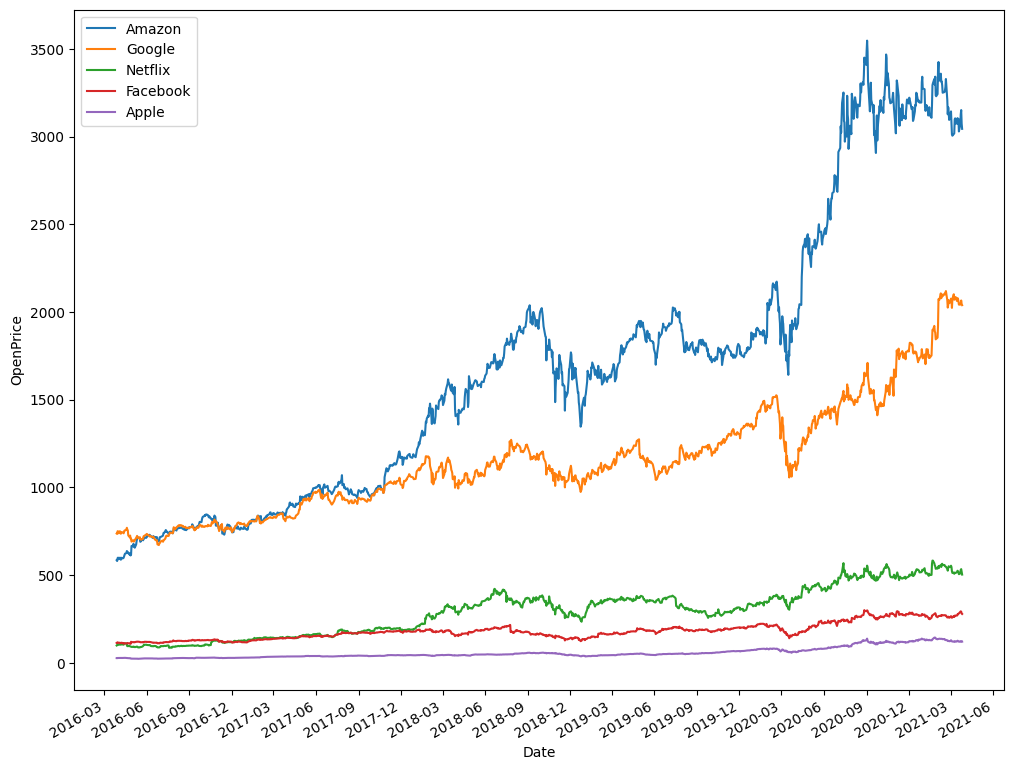

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

companies = ['Amazon', 'Google', 'Netflix', 'Facebook', 'Apple']

company_stockprice_data_path = {
    'Amazon': '../dataset/Amazon_Historical_StockPrice2.csv',
    'Apple': '../dataset/Apple_Historical_StockPrice2.csv',
    'Facebook': '../dataset/Facebook_Historical_StockPrice2.csv',
    'Google': '../dataset/Google_Historical_StockPrice2.csv',
    'Netflix': '../dataset/Netflix_Historical_StockPrice2.csv',
}

company_stockprice_data = dict.fromkeys(companies)
datefmt = mdates.DateFormatter('%Y-%m')
datelocator = mdates.MonthLocator(interval=3)

for company in companies:
    company_stockprice_data[company] = pd.read_csv(company_stockprice_data_path[company]).dropna(how='any')


def configure_plot():
    plt.figure(figsize=(12, 10), dpi=100)
    plt.gca().xaxis.set_major_formatter(datefmt)
    plt.gca().xaxis.set_major_locator(datelocator)
    plt.gcf().autofmt_xdate()


configure_plot()

for company in companies:
    stockprice = company_stockprice_data[company]
    stockprice.Date = pd.to_datetime(stockprice.Date)

    stockprice['OpenCloseDiff'] = stockprice.Open - stockprice.Close  # разница между ценой открытия и закрытия

    plt.plot(stockprice.Date, stockprice.Open) # график по цене открытия

plt.legend(companies)
plt.ylabel('OpenPrice')
plt.xlabel('Date')
plt.show()

# График цен акций разных компаний с датами
- Возможно эффективно сравнивать цену в разные периоды времени

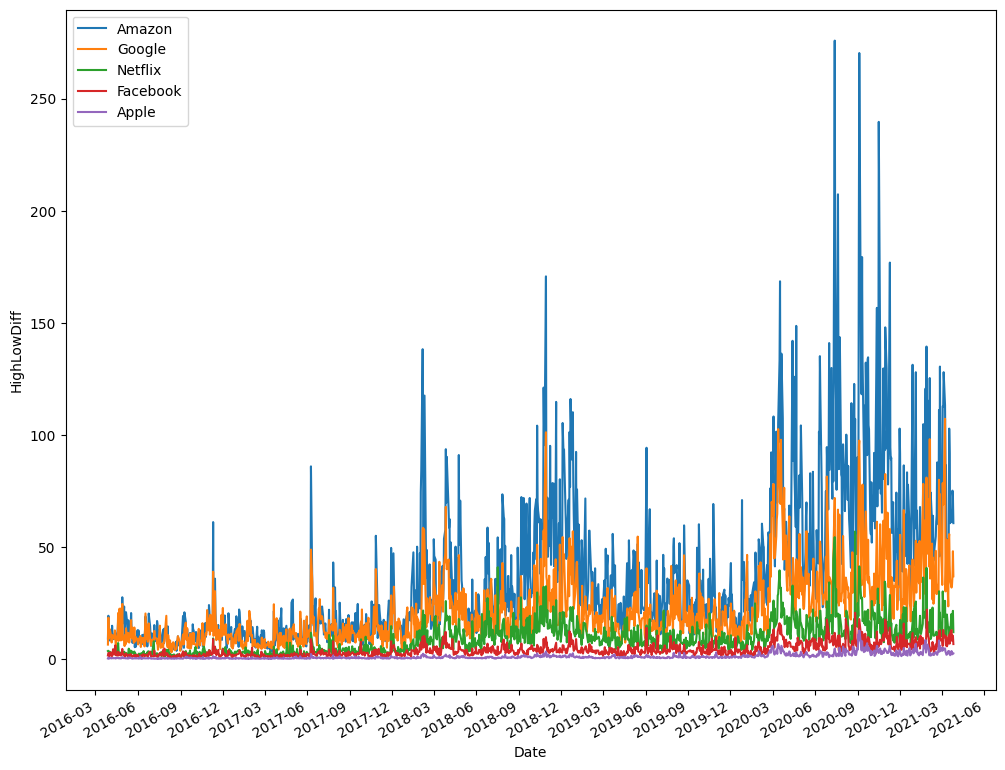

In [3]:
configure_plot()

for company in companies:
    stockprice = company_stockprice_data[company]

    stockprice['HighLowDiff'] = stockprice.High - stockprice.Low # разница между максимальной и минимальной ценой

    plt.plot(stockprice.Date, stockprice.HighLowDiff) # график по цене открытия

plt.legend(companies)
plt.ylabel('HighLowDiff')
plt.xlabel('Date')
plt.show()

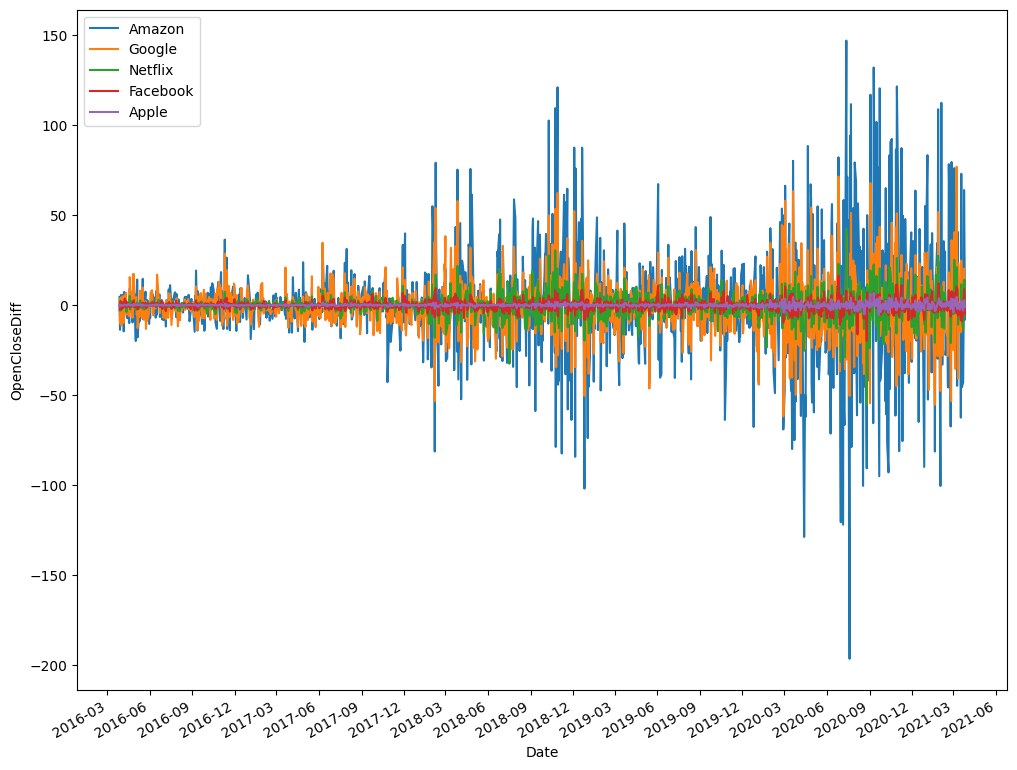

In [4]:
configure_plot()
for company in sorted(companies, key=lambda x: company_stockprice_data[x].OpenCloseDiff.min()):
    stockprice = company_stockprice_data[company]
    plt.plot(stockprice.Date, stockprice.OpenCloseDiff)

plt.ylabel('OpenCloseDiff')
plt.xlabel('Date')
plt.legend(companies)
plt.show()

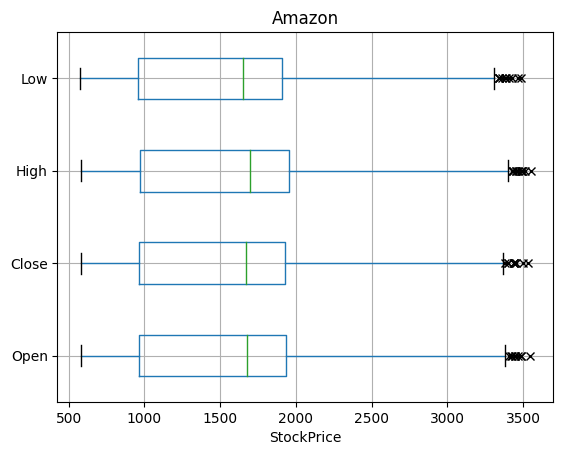

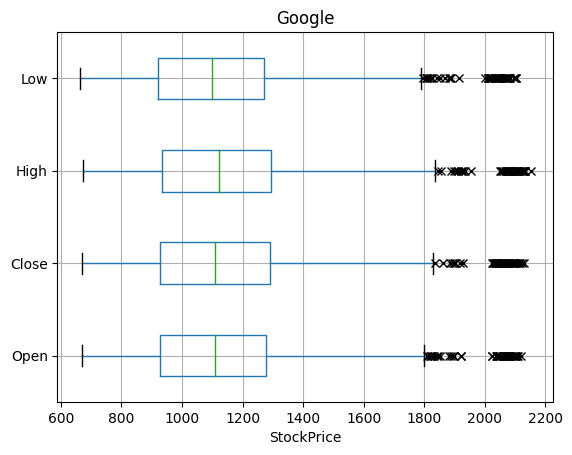

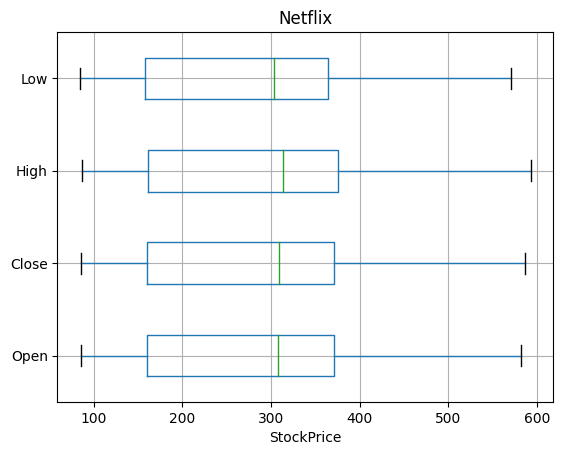

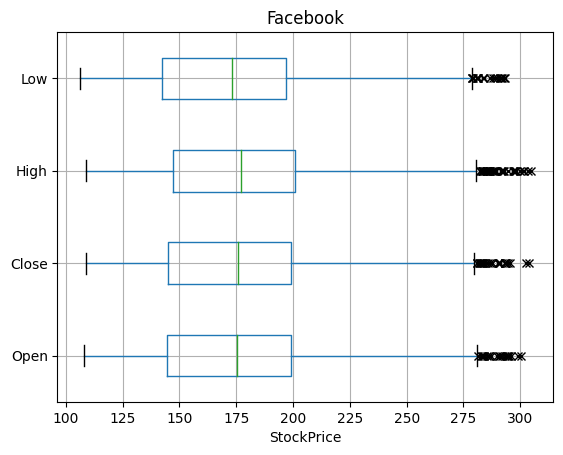

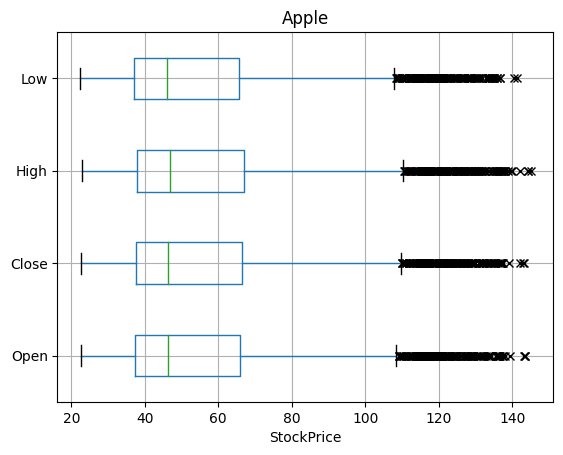

In [5]:
stockprice_features = ['Open', 'Close', 'High', 'Low']

for company in companies:
    stockprice = company_stockprice_data[company]
    stockprice[stockprice_features].boxplot(
        vert=False,
        flierprops={"marker": "x"},
    )
    plt.title(company)
    plt.xlabel('StockPrice')
    plt.show()

# Ящики с усами по цене открытия
- Видно, как amazon, google, facebook, apple вылезают за пределы минимума и максимума, в отчие от netflx.
- Поскольку nextflix предоставляет в большинстве своем онлайн услуги.
- Поэтому в условиях пандемии, когда офлайн услуги были недоступны, то цена акций была непредсказуема.

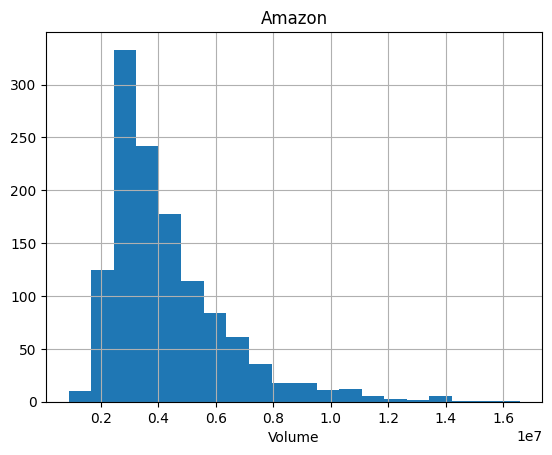

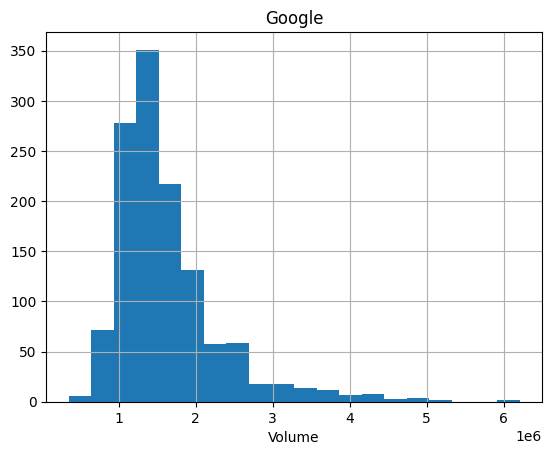

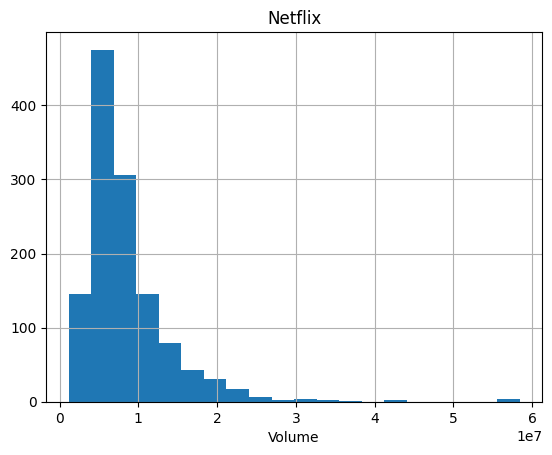

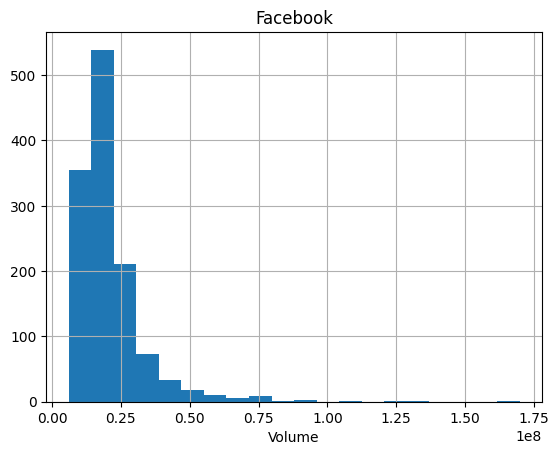

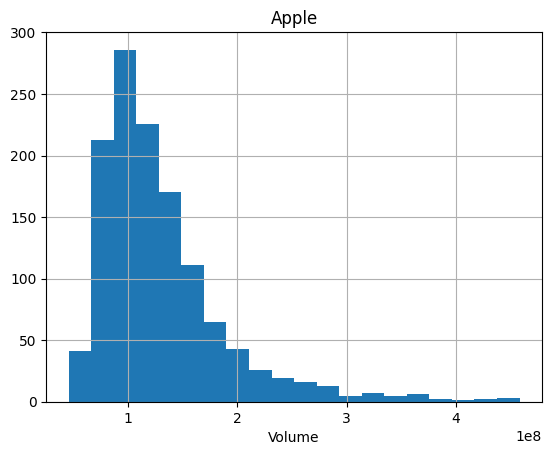

In [6]:
stockprice_features = ['Volume']

for company in companies:
    stockprice = company_stockprice_data[company]
    stockprice[stockprice_features].hist(bins=20)
    plt.title(company)
    plt.xlabel('Volume')
    plt.show()

# Распределение по параметру Volume

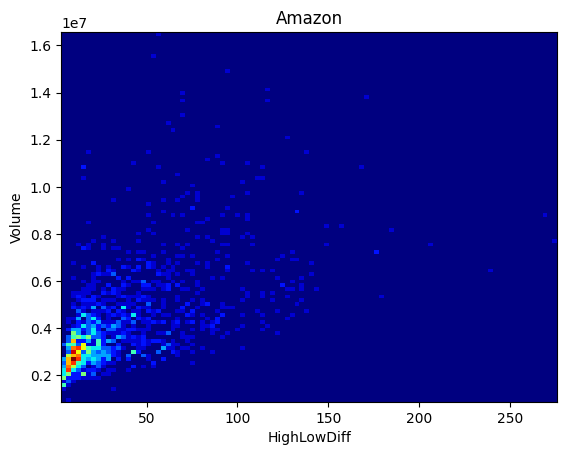

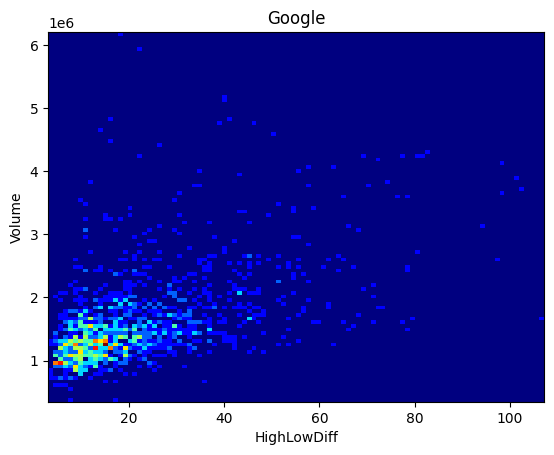

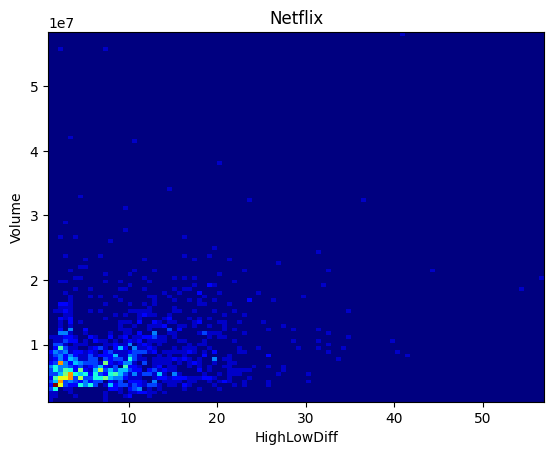

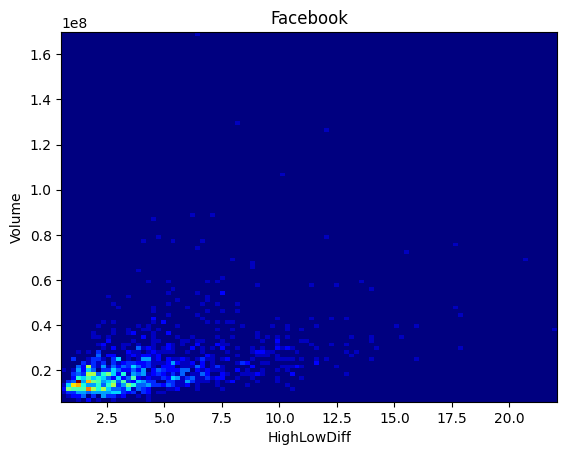

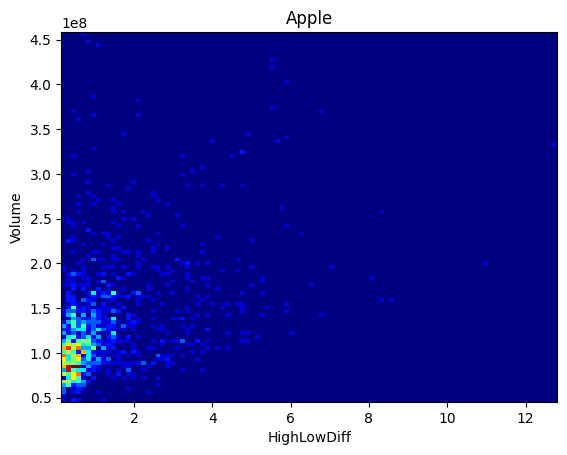

In [7]:
for company in companies:
    plt.hist2d(company_stockprice_data[company]['HighLowDiff'], company_stockprice_data[company]['Volume'], bins=(100,100), cmap=plt.cm.jet)
    plt.title(company)
    plt.xlabel('HighLowDiff')
    plt.ylabel('Volume')
    plt.show()

# Гистограмма по двум параметрам Volume и HighLowDiff
- Люди торгуют больше, когда рынок не волотилен

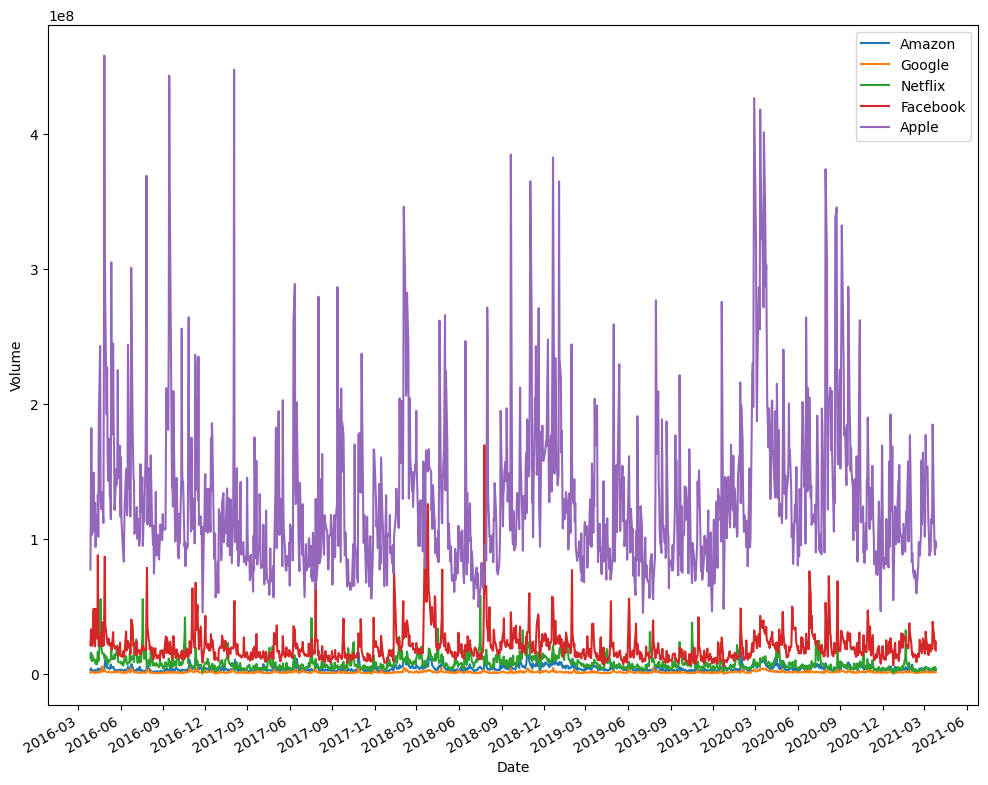

In [8]:
configure_plot()
for company in companies:
    stockprice = company_stockprice_data[company]
    plt.plot(stockprice.Date, stockprice.Volume)

plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(companies)
plt.show()

# График по количеству акций, торгуемых в течение торгового дня
# Гипотезы:
- Возможно рекламная компании Apple намного успешнее, чем у других.
- Чем дешевле акции, тем большее их количество торгуется в течении торгового дня.